In [ ]:
import cv2 as cv
from PIL import Image
import os
from pathlib import Path
import matplotlib.pyplot as plt
from google.colab.patches import *
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
folder='/content/drive/MyDrive/WILDFIRE PREDICTION/train'

In [ ]:
dataframe = []

In [ ]:
for class_label in ['nowildfire','wildfire']:
  image_folder = os.path.join(folder,class_label)
  print(class_label," : ",len(os.listdir(image_folder)))

nowildfire  :  14527
wildfire  :  15760


In [ ]:
image_path = '/content/drive/MyDrive/WILDFIRE PREDICTION/train/nowildfire/-113.917243,51.101323.jpg'
img = cv.imread(image_path)
height, width, channels = img.shape
print('HEIGHT: ',height,' WIDTH: ',width,' CHANNELS: ',channels)

HEIGHT:  1733  WIDTH:  437  CHANNELS:  3


In [ ]:
X = []
Y = []

for class_label in ['nowildfire','wildfire']:
  image_folder = os.path.join(folder,class_label)
  count = 0
  for image in os.listdir(image_folder):
    if count == 100:
      break
    if count % 10 == 0:
      print("==========",count,"==========")
    count += 1
    image_path = os.path.join(image_folder,image)
    image_data = cv.imread(image_path)
    image_data = cv.cvtColor(image_data, cv.COLOR_BGR2GRAY)
    resized_img = cv.resize(image_data, (100, 100))
    X.append(resized_img)
    if class_label == 'nowildfire':
      Y.append(0)
    else:
      Y.append(1)

========== 0 ==========
========== 10 ==========
========== 20 ==========
========== 30 ==========
========== 40 ==========
========== 50 ==========
========== 60 ==========
========== 70 ==========
========== 80 ==========
========== 90 ==========
========== 0 ==========
========== 10 ==========
========== 20 ==========
========== 30 ==========
========== 40 ==========
========== 50 ==========
========== 60 ==========
========== 70 ==========
========== 80 ==========
========== 90 ==========


In [ ]:
Y = to_categorical(Y)

In [ ]:
X = np.array(X).reshape(-1,100,100,1)

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.01,random_state=42)

In [ ]:
from keras.layers import Dense,Activation,Flatten,Conv2D,MaxPooling2D,Dropout,BatchNormalization, ZeroPadding2D
from keras.models import Sequential 
from tensorflow.keras.optimizers import Adam
from keras.utils import to_categorical
from tensorflow.keras.losses import CategoricalCrossentropy
import keras

In [ ]:
model=Sequential()
model.add(ZeroPadding2D((1,1),input_shape=(100,100, 1)))
model.add(Conv2D(64, (3, 3), activation='relu', padding = "same"))
model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(64, (3, 3), activation='relu', padding = "same"))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Dense(2, activation = "softmax"))
model.compile(optimizer=Adam(lr=0.001),loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 zero_padding2d (ZeroPadding  (None, 102, 102, 1)      0         
 2D)                                                             
                                                                 
 conv2d (Conv2D)             (None, 102, 102, 64)      640       
                                                                 
 zero_padding2d_1 (ZeroPaddi  (None, 104, 104, 64)     0         
 ng2D)                                                           
                                                                 
 conv2d_1 (Conv2D)           (None, 104, 104, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 52, 52, 64)       0         
 )                                                               
                                                        

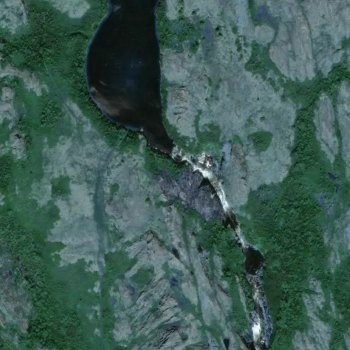

In [ ]:
temp_image = cv.imread('/content/drive/MyDrive/WILDFIRE PREDICTION/valid/wildfire/-57.25,51.51.jpg')
temp_image = cv.cvtColor(temp_image, cv.COLOR_BGR2RGB)
cv2_imshow(temp_image)

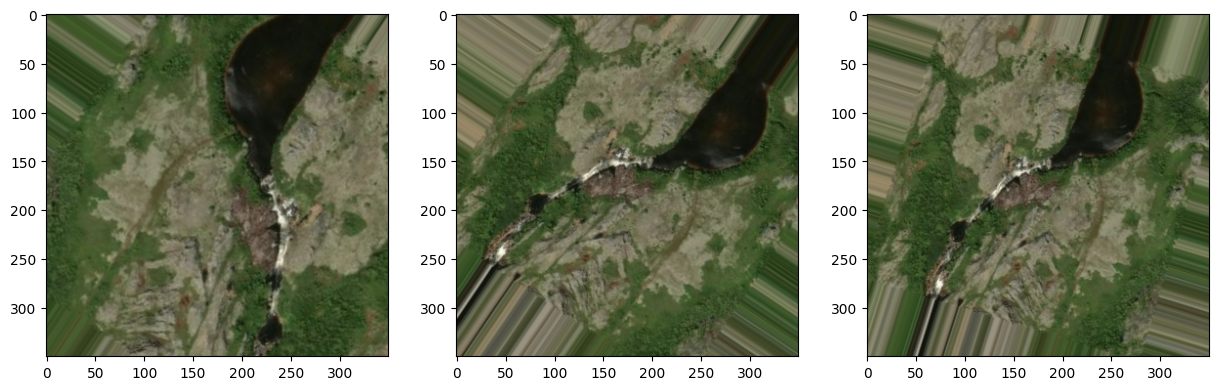

In [ ]:
datagen = ImageDataGenerator(
        rotation_range=40, 
        width_shift_range=0.1,  
        height_shift_range=0.1, 
        zoom_range=0.2,  
        horizontal_flip=True, 
)

aug_iter = datagen.flow(np.array([temp_image]),batch_size=1)
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15,15))

for i in range(3):
	image = next(aug_iter)[0].astype('uint8')
	ax[i].imshow(image)
 
datagen.fit((x_train))

In [ ]:
History = model.fit(datagen.flow(x_train,y_train, batch_size=1000),epochs = 5, validation_data = (x_test,y_test),verbose = 1)

Epoch 1/5
1/1 [==============================] - 16s 16s/step - loss: 24.9152 - accuracy: 0.4949 - val_loss: 11420.3008 - val_accuracy: 0.0000e+00
Epoch 2/5
1/1 [==============================] - 0s 457ms/step - loss: 5429.4370 - accuracy: 0.5051 - val_loss: 6048.3960 - val_accuracy: 0.0000e+00
Epoch 3/5
1/1 [==============================] - 0s 390ms/step - loss: 2856.1533 - accuracy: 0.5051 - val_loss: 1496.3889 - val_accuracy: 0.0000e+00
Epoch 4/5
1/1 [==============================] - 0s 378ms/step - loss: 697.6746 - accuracy: 0.5051 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 5/5
1/1 [==============================] - 0s 384ms/step - loss: 253.2025 - accuracy: 0.4949 - val_loss: 0.0000e+00 - val_accuracy: 1.0000


In [ ]:
for layer in model.layers:
    
    if 'conv' not in layer.name:
        continue    
    filters , bias = layer.get_weights()
    print(layer.name , filters.shape)

conv2d (3, 3, 1, 64)
conv2d_1 (3, 3, 64, 64)


In [ ]:
filters , bias = model.layers[1].get_weights()

In [ ]:
f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max - f_min)

In [ ]:
for i in range(len(model.layers)):
    layer = model.layers[i]
    if 'conv' not in layer.name:
        continue    
    print(i , layer.name , layer.output.shape)



1 conv2d (None, 102, 102, 64)
3 conv2d_1 (None, 104, 104, 64)


In [ ]:
from tensorflow.keras.models import Model

In [ ]:
model = Model(inputs=model.inputs , outputs=model.layers[0].output)

7/7 [==============================] - 0s 2ms/step


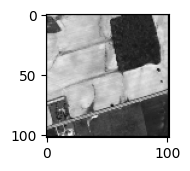

In [ ]:
features = model.predict(x_train)

fig = plt.figure(figsize=(20,15))
for i in range(1,features.shape[3]+1):

    plt.subplot(8,8,i)
    plt.imshow(features[0,:,:,i-1] , cmap='gray')
    
plt.show()

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing.image import load_img, img_to_array

flattened = []
label = []
model = VGG16(weights='imagenet', include_top=False)
from PIL import Image, ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True
for i in os.listdir('/content/drive/MyDrive/WILDFIRE PREDICTION/train/wildfire'):
  img = load_img('/content/drive/MyDrive/WILDFIRE PREDICTION/train/wildfire/'+i, target_size=(224, 224))
  img_array = img_to_array(img)
  img_array = tf.expand_dims(img_array, axis=0)
  features = model(img_array)
  flat_vector = tf.keras.layers.Flatten()(features)
  flattened.append((flat_vector).numpy()[0])
  label.append(1)


for i in os.listdir('/content/drive/MyDrive/WILDFIRE PREDICTION/train/nowildfire'):
  img = load_img('/content/drive/MyDrive/WILDFIRE PREDICTION/train/nowildfire/'+i, target_size=(224, 224))
  img_array = img_to_array(img)
  img_array = tf.expand_dims(img_array, axis=0)
  features = model(img_array)
  flat_vector = tf.keras.layers.Flatten()(features)
  flattened.append((flat_vector).numpy()[0])
  label.append(0)

In [ ]:
X = []
for i in flattened:
  X.append(list(i))
Y = label

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.1, random_state=42)

In [ ]:
from sklearn import svm
SVM=svm.SVC()
SVM.fit(X_train,y_train)
SVM.score(X_test,y_test)

In [ ]:
from sklearn.neural_network import MLPClassifier
MLP_temp = MLPClassifier()
MLP_temp.fit(X_train,y_train)
MLP_temp.score(X_test,y_test)

In [ ]:
from sklearn.naive_bayes import GaussianNB
NB= GaussianNB()
NB.fit(X_train,y_train)
NB.score(X_test,y_test)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
TREE= DecisionTreeClassifier()
TREE.fit((X_train),y_train)
TREE.score(X_test,y_test)

In [ ]:
from sklearn import linear_model
LR = linear_model.LogisticRegression(random_state=0)
LR.fit(X_train, y_train)
LR.score(X_test,y_test)